# Load Data

In [16]:
import pandas as pd  
from scraping_utils import read_json, flatten_list

In [17]:
data_keywords = read_json("data_videos\data_videos.json")
df1 = pd.DataFrame(data_keywords)
df1.head()

,url_video,duracion_video,titulo_video,nombre_canal
0,None,,AMT2 - Extracting Emails from your Gmail Inbox...,DigitalSreeni
1,None,,Read emails with Python + Gmail API (part 1),ian samir
2,None,,Logra Más Con Menos Esfuerzo - Esencialismo de...,Mis Propias Finanzas
3,None,,Estratégia de trading con ChatGPT 4 Code Inter...,Rodrigo Prieto
4,None,,AI & Machine Learning in Finance: AI Applicati...,Swedish House of Finance


In [18]:
df1 = df1[['titulo_video','nombre_canal' ]] 

In [19]:
df1.nombre_canal.value_counts() 
df_per_canal = df1.nombre_canal.value_counts()
df_per_canal = df_per_canal.to_frame().reset_index() 

# Seccion nltk 

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
nltk.download('punkt')
nltk.download('stopwords')

from nlp_utils import PreprocessingData

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
preprocessing =PreprocessingData()

In [22]:
lngs = []
# Agregar columna de palabras clave a DataFrame
columns = ['keywords', "lngs"]
data_keywords = df1['titulo_video'].apply(preprocessing.process_text,  lngs =lngs) # lista de tiplas:[ ( [keywords], lng) ]

df2 = pd.DataFrame( [[x,y] for x,y in data_keywords.values] , columns= columns)
df2

,keywords,lngs
0,"[amt2, extracting, emails, gmail, inbox, using...",en
1,"[read, emails, python, gmail, api, part, 1]",en
2,"[logra, menos, esfuerzo, esencialismo, greg, m...",es
3,"[estratégia, trading, chatgpt, 4, code, interp...",es
4,"[ai, machine, learning, finance, ai, applicati...",en
...,...,...
3095,"[cómo, posicionar, apps, móviles, play, store,...",es
3096,"[sergio, fajardo, cafe, picante]",es
3097,"[debate, petro, robledo, mundo, trabajo]",es
3098,"[punto, gustavo, petro, candidato, presidencial]",es


In [23]:
df1[pd.isnull(df2.lngs)]['titulo_video'].to_list()[:5]


['DIY Thermal Camera using AMG8833 Thermal Image Array Temperature Sensor & Raspberry Pi',
 'Second Brain Notion template',
 'Robotics Software Engineer Roadmap',
 "Inside Ali Abdaal's Second Brain System",
 'High Frequency Trading']

In [24]:
df = pd.concat([df1, df2], axis= 1)
df.head(3)

,titulo_video,nombre_canal,keywords,lngs
0,AMT2 - Extracting Emails from your Gmail Inbox...,DigitalSreeni,"[amt2, extracting, emails, gmail, inbox, using...",en
1,Read emails with Python + Gmail API (part 1),ian samir,"[read, emails, python, gmail, api, part, 1]",en
2,Logra Más Con Menos Esfuerzo - Esencialismo de...,Mis Propias Finanzas,"[logra, menos, esfuerzo, esencialismo, greg, m...",es


In [25]:
df["bigrams"]= [list(nltk.bigrams(x)) for x in df2.keywords] 
df.head(3)

,titulo_video,nombre_canal,keywords,lngs,bigrams
0,AMT2 - Extracting Emails from your Gmail Inbox...,DigitalSreeni,"[amt2, extracting, emails, gmail, inbox, using...",en,"[(amt2, extracting), (extracting, emails), (em..."
1,Read emails with Python + Gmail API (part 1),ian samir,"[read, emails, python, gmail, api, part, 1]",en,"[(read, emails), (emails, python), (python, gm..."
2,Logra Más Con Menos Esfuerzo - Esencialismo de...,Mis Propias Finanzas,"[logra, menos, esfuerzo, esencialismo, greg, m...",es,"[(logra, menos), (menos, esfuerzo), (esfuerzo,..."


In [26]:
md_bigrams = flatten_list(df.bigrams)
fdist = nltk.FreqDist(md_bigrams)
fdist.most_common(5)

[(('machine', 'learning'), 48),
 (('raspberry', 'pi'), 45),
 (('full', 'course'), 41),
 (('delta', 'robot'), 32),
 (('data', 'science'), 31)]

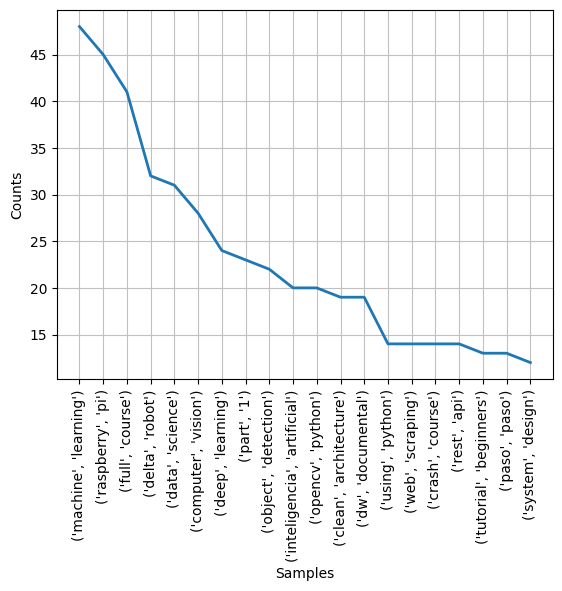

<Axes: xlabel='Samples', ylabel='Counts'>

In [27]:
fdist.plot(20)

### filtrado por longitud de la palabra 

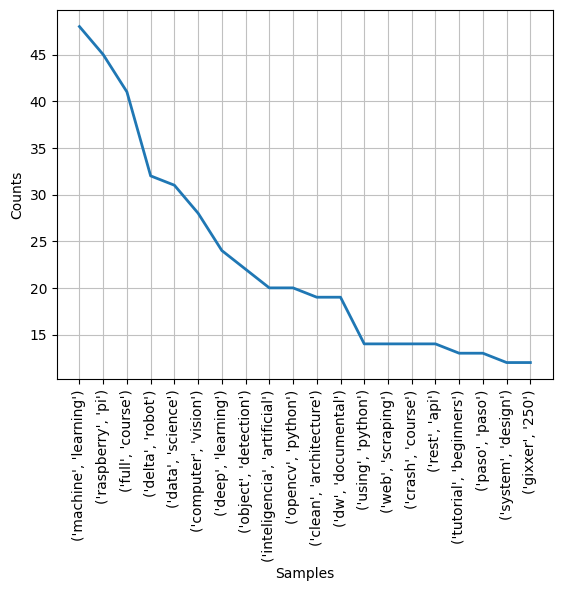

<Axes: xlabel='Samples', ylabel='Counts'>

In [28]:
threshold = 1
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0])>threshold and len(bigram[1])>threshold]
filtered_dist = nltk.FreqDist(filtered_bigrams)
filtered_dist.plot(20)

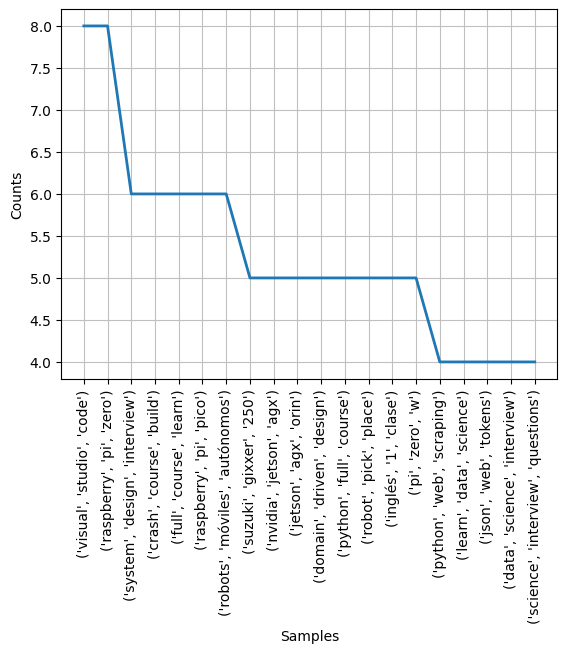

<Axes: xlabel='Samples', ylabel='Counts'>

In [29]:
df["trigrams"]= [list(ngrams(x, 3)) for x in df2.keywords] 
md_trigrams = flatten_list(df.trigrams)
fdist = nltk.FreqDist(md_trigrams)
fdist.plot(20)

## Export data frame 

In [30]:
# df.to_parquet('data_videos/dataframes/data.parquet')
df.to_csv('data_videos/dataframes/data.csv', index= False )